### Keyboard Shortcuts
When describing keyboard shortcuts, `+` means 'press at the same time', `,` means 'press after.

See more at Help > Keyboard Shortcuts.

| Command       | Function      |
| ------------- |:-------------:|
| `Esc`|Stop editing this cell|
|`Shift + Enter`|Run this cell|
|`Alt + Enter`| Run this cell and make a new cell after it|
|`Esc, a`| Create a new cell above the current one|
|`Esc, b`| Create a new cell below the current one|
|`Esc, x`| Cut cell|
|`Esc, v`| Paste cell|
|`Esc, d, d`|Delete the current cell|
|`Ctrl + /`| Toggle comments in Python code (Linux / Windows)|
|`Up Arrow`, `Down Arrow`| Navigate between cells (in command mode)|
|`Esc, m, Enter`| Convert the current cell to markdown and start editing it again|
|`Esc, y, Enter`| Convert the current cell to a code cell and start editing it again|


[Markdown Cheat Sheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet).


## Analyze pandas-processed node-edge contacts of Hv1-2GBI system.

By: Victoria Lim  
Last updated: 2017-09-12

### Version 3

* Clean, streamline for comparing multiple trajectories.
* Add in heat maps with GBI for each trajectory.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns # heatmap with pandas

%matplotlib inline

### Automate conversion of node index to residue number with one-letter residue label

In [59]:
aa_dict = {'CYS': 'C', 'ASP': 'D', 'SER': 'S', 'GLN': 'Q', 'LYS': 'K',
     'ILE': 'I', 'PRO': 'P', 'THR': 'T', 'PHE': 'F', 'ASN': 'N', 
     'GLY': 'G', 'HIS': 'H', 'HSD': 'H', 'LEU': 'L', 'ARG': 'R', 'TRP': 'W', 
     'ALA': 'A', 'VAL':'V', 'GLU': 'E', 'TYR': 'Y', 'MET': 'M',
     'GBI1':'GBI1', 'GBI2':'GBI2', 'WAT':'WAT'}

In [61]:
def idxToResid(idx, nodes):
    """
    This function takes in some node index and generates 
    a string code of one-letter residue name and integer of residue number.
    
    NOTE: This function does NOT differentiate what section 
    of residue the index is (e.g., backbone or sidechain).
    
    Parameters
    ----------
    
    Returns
    -------
    
    
    """
    entry = nodes.iloc[idx-1]
    resname = entry['resname']
    if resname in ['GBI1','GBI2']:
        code = aa_dict[resname]+':'+entry['code']
    elif resname == 'WAT':
        code = aa_dict[resname]+str(entry['resid'])
    else:
        code = aa_dict[resname]+str(entry['resid'])+':'+entry['location']
    return code

### Load in data

In [4]:
nodes_r, edges_r = pickle.load( open( 'pickled_170907/t1ref.pickle', "rb" ))
nodes_1, edges_1 = pickle.load( open( 'pickled_170907/taut1.pickle', "rb" ))
nodes_2, edges_2 = pickle.load( open( 'pickled_170907/taut2.pickle', "rb" ))
nodes_0, edges_0 = pickle.load( open( 'pickled_170907/noGBI.pickle', "rb" ))

In [37]:
nodes_r.loc[nodes_r['resname'] == 'GBI1']

,resname,resid,location,type,code,nAtoms
index,,,,,,
11231,GBI1,230,lg,NOP,BENZ,6
11232,GBI1,230,lg,DIP,NN,1
11233,GBI1,230,lg,DIP,CN,2
11234,GBI1,230,lg,POS,GUAN,4


### For Hv1 protein, subtract average number of contacts from ref (taut1, pre-FEP)

In [5]:
# taut2 minus reference
edges_2r = edges_2.merge(edges_r,on=['node_i','node_j'],how='inner')
edges_2r['avg_subt'] = edges_2r['average_x']-edges_2r['average_y']

# taut1 minus t1ref
edges_1r = edges_1.merge(edges_r,on=['node_i','node_j'],how='inner')
edges_1r['avg_subt'] = edges_1r['average_x']-edges_1r['average_y']

# noGBI minus t1ref
edges_0r = edges_0.merge(edges_r,on=['node_i','node_j'],how='inner')
edges_0r['avg_subt'] = edges_0r['average_x']-edges_0r['average_y']

### Check out details on interaction "strength," classified by interaction type

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2b9d04edd518>]], dtype=object)

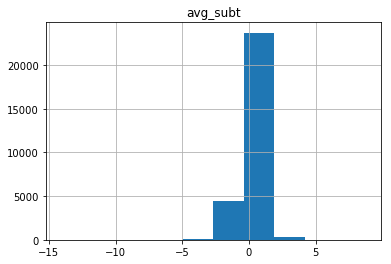

In [6]:
edges_2r.hist(column='avg_subt')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2b9d19ffb860>]], dtype=object)

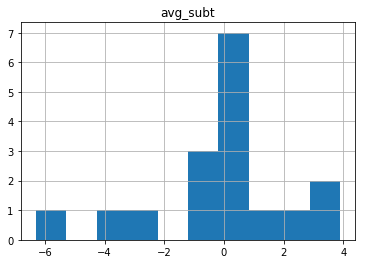

In [7]:
edges_2r.loc[edges_2r['attribute_x'] == 'COUL'].hist(column='avg_subt')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2b9d1a1f92e8>]], dtype=object)

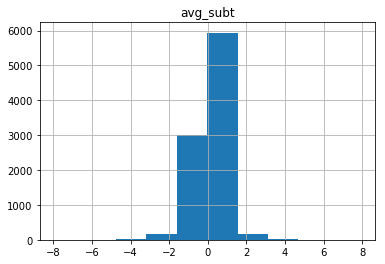

In [8]:
edges_2r.loc[edges_2r['attribute_x'] == 'STER'].hist(column='avg_subt')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2b9d1a29ae48>]], dtype=object)

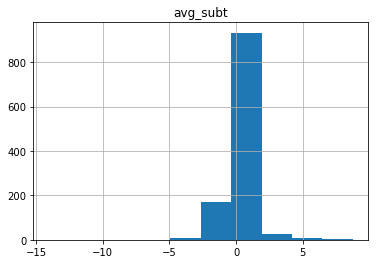

In [9]:
edges_2r.loc[edges_2r['attribute_x'] == 'HPHOB'].hist(column='avg_subt')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2afcb4a3bcf8>]], dtype=object)

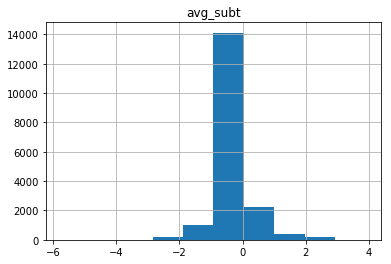

In [34]:
edges_2r.loc[edges_2r['attribute_x'] == 'HBOND'].hist(column='avg_subt')

In [10]:
edges_2r.groupby('attribute_x').count()

,node_i,node_j,weight_x,count_x,average_x,weight_y,attribute_y,count_y,average_y,avg_subt
attribute_x,,,,,,,,,,
COUL,17,17,17,17,17,17,17,17,17,17
HBOND,18091,18091,18091,18091,18091,18091,18091,18091,18091,18091
HPHOB,1149,1149,1149,1149,1149,1149,1149,1149,1149,1149
STER,9317,9317,9317,9317,9317,9317,9317,9317,9317,9317


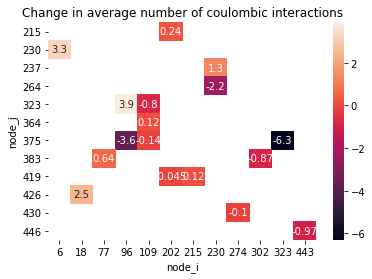

avg_subt                                                             \
node_j      215       230 237 264       323    364       375       383 419   
node_i                                                                       
6           NaN  3.286832 NaN NaN       NaN    NaN       NaN       NaN NaN   
18          NaN       NaN NaN NaN       NaN    NaN       NaN       NaN NaN   
77          NaN       NaN NaN NaN       NaN    NaN       NaN  0.638365 NaN   
96          NaN       NaN NaN NaN  3.892982    NaN -3.643829       NaN NaN   
109         NaN       NaN NaN NaN -0.795745  0.118 -0.139525       NaN NaN   

                          
node_j       426 430 446  
node_i                    
6            NaN NaN NaN  
18      2.482323 NaN NaN  
77           NaN NaN NaN  
96           NaN NaN NaN  
109          NaN NaN NaN

In [73]:
heatdata_2r = edges_2r[['node_i','node_j','avg_subt']].loc[edges_2r['attribute_x'] == 'COUL']

heatdata_2r = heatdata_2r.pivot(index='node_i',columns='node_j')
heatdata_2r = heatdata_2r.dropna(axis=1,how='all') # drop columns with all nan's
ylabels = [x[1] for x in list(heatdata_2r)]
heatdata_2r.head()
ax = sns.heatmap(heatdata_2r.T,annot=True,yticklabels=ylabels)
plt.ylabel('node_j')
plt.title('Change in average number of coulombic interactions')
plt.show()
heatdata_2r.head()

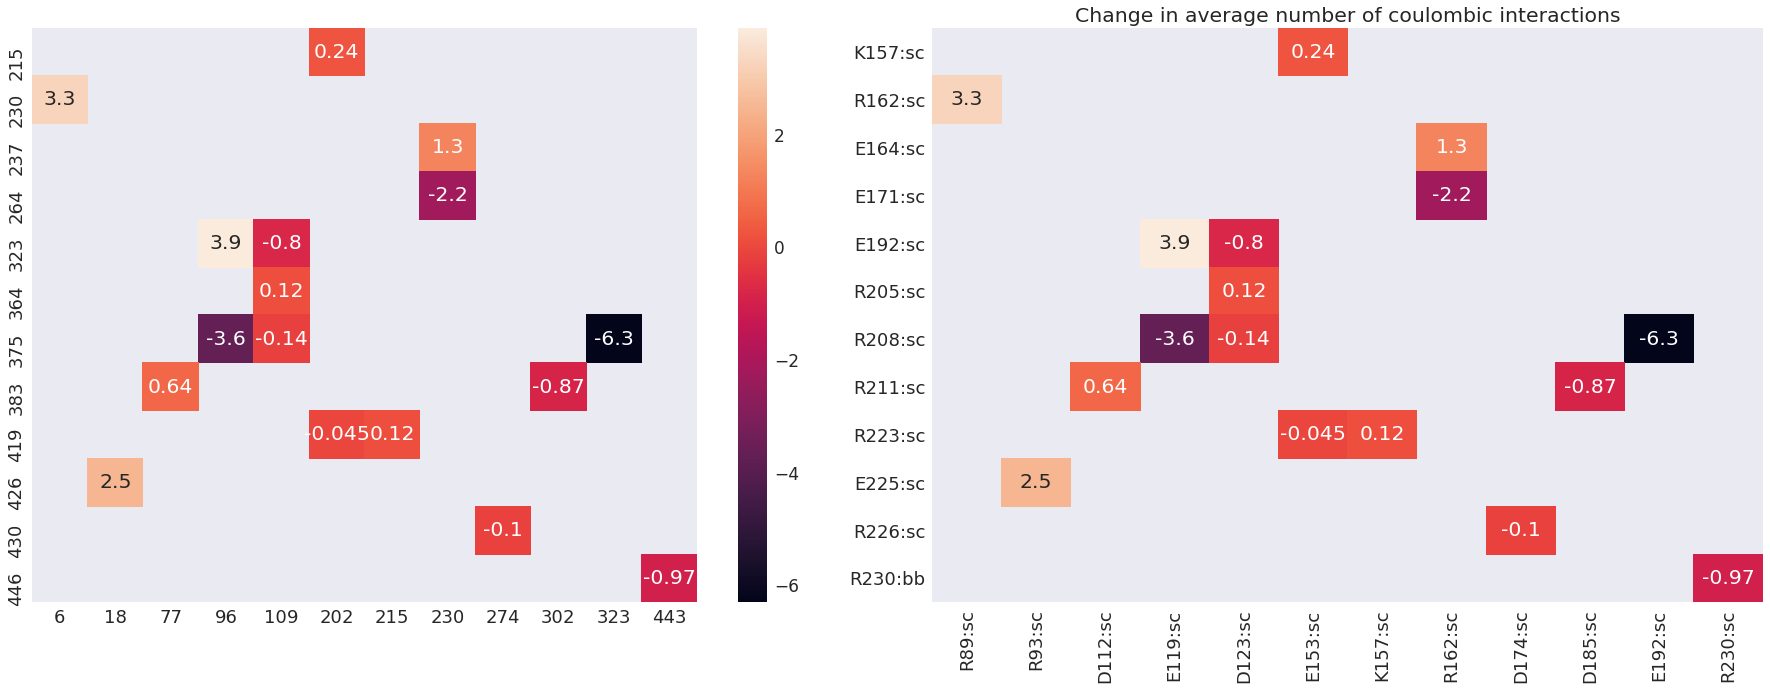

avg_subt                                                             \
node_j      215       230 237 264       323    364       375       383 419   
node_i                                                                       
6           NaN  3.286832 NaN NaN       NaN    NaN       NaN       NaN NaN   
18          NaN       NaN NaN NaN       NaN    NaN       NaN       NaN NaN   
77          NaN       NaN NaN NaN       NaN    NaN       NaN  0.638365 NaN   
96          NaN       NaN NaN NaN  3.892982    NaN -3.643829       NaN NaN   
109         NaN       NaN NaN NaN -0.795745  0.118 -0.139525       NaN NaN   

                          
node_j       426 430 446  
node_i                    
6            NaN NaN NaN  
18      2.482323 NaN NaN  
77           NaN NaN NaN  
96           NaN NaN NaN  
109          NaN NaN NaN

In [70]:
heat_2r_coul = edges_2r[['node_i','node_j','avg_subt']].loc[edges_2r['attribute_x'] == 'COUL']
heat_2r_coul = heat_2r_coul.pivot(index='node_i',columns='node_j')
heat_2r_coul = heat_2r_coul.dropna(axis=1,how='all') # drop columns with all nan's
ylabels1 = [x[1] for x in list(heat_2r_coul)]
ylabels2 = [idxToResid(i, nodes_r) for i in [x[1] for x in list(heat_2r_coul)]] # get node_j's, convert idxToResid
xlabels = [idxToResid(i, nodes_r) for i in list(heat_2r_coul.index.values)] # get node_i's, convert idxToResid

plt.clf()
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(25,10))
sns.set(font_scale=1.7)
sns.heatmap(heat_2r_coul.T,annot=True,ax=ax1,yticklabels=ylabels1)
sns.heatmap(heat_2r_coul.T,annot=True,ax=ax2,yticklabels=ylabels2,xticklabels=xlabels,cbar=False)
plt.xlabel('')
for ax in plt.gcf().axes:
    l = ax.get_xlabel()
    ax.set_xlabel('', fontsize=15)
    ax.set_ylabel('', fontsize=15)
plt.title('Change in average number of coulombic interactions')


plt.tight_layout()
plt.show()
heat_2r_coul.head()

In [50]:
edges_2r_maxhphob = edges_2r.loc[edges_2r['attribute_x'] == 'HPHOB'].sort_values('avg_subt',ascending=False).head(10)
edges_2r_maxhphob

,node_i,node_j,weight_x,attribute_x,count_x,average_x,weight_y,attribute_y,count_y,average_y,avg_subt
1381,25,28,8673,HPHOB,500.0,17.346000,3625,HPHOB,422.0,8.590047,8.755953
8859,243,246,3984,HPHOB,440.0,9.054545,254,HPHOB,198.0,1.282828,7.771717
8371,211,223,5920,HPHOB,500.0,11.840000,2231,HPHOB,446.0,5.002242,6.837758
2889,73,85,3574,HPHOB,498.0,7.176707,17,HPHOB,13.0,1.307692,5.869015
8166,192,195,3196,HPHOB,485.0,6.589691,43,HPHOB,32.0,1.343750,5.245941
13429,334,348,7049,HPHOB,500.0,14.098000,4448,HPHOB,496.0,8.967742,5.130258
36,3,5,3491,HPHOB,473.0,7.380550,453,HPHOB,191.0,2.371728,5.008822
8443,221,223,2141,HPHOB,378.0,5.664021,1,HPHOB,1.0,1.000000,4.664021
7573,144,154,2660,HPHOB,475.0,5.600000,4,HPHOB,4.0,1.000000,4.600000
8778,240,267,3248,HPHOB,500.0,6.496000,380,HPHOB,179.0,2.122905,4.373095


In [49]:
edges_2r_minhphob = edges_2r.loc[edges_2r['attribute_x'] == 'HPHOB'].sort_values('avg_subt',ascending=True).head(10)
edges_2r_minhphob

,node_i,node_j,weight_x,attribute_x,count_x,average_x,weight_y,attribute_y,count_y,average_y,avg_subt
8775,240,243,1,HPHOB,1.0,1.000000,7475,HPHOB,496.0,15.070565,-14.070565
1455,28,46,2837,HPHOB,443.0,6.404063,8386,HPHOB,495.0,16.941414,-10.537351
12085,313,316,251,HPHOB,55.0,4.563636,2971,HPHOB,326.0,9.113497,-4.549861
1449,27,46,2331,HPHOB,494.0,4.718623,4395,HPHOB,500.0,8.790000,-4.071377
7820,160,165,209,HPHOB,80.0,2.612500,3282,HPHOB,496.0,6.616935,-4.004435
12010,307,318,2024,HPHOB,500.0,4.048000,3570,HPHOB,500.0,7.140000,-3.092000
440,17,211,659,HPHOB,311.0,2.118971,2598,HPHOB,500.0,5.196000,-3.077029
45,3,221,4919,HPHOB,480.0,10.247917,6617,HPHOB,499.0,13.260521,-3.012604
10765,251,267,1,HPHOB,1.0,1.000000,1932,HPHOB,499.0,3.871743,-2.871743
3216,99,112,399,HPHOB,94.0,4.244681,3487,HPHOB,500.0,6.974000,-2.729319


In [48]:
edges_2r_subhphob = pd.concat([edges_2r_maxhphob,edges_2r_minhphob])
edges_2r_subhphob

,node_i,node_j,weight_x,attribute_x,count_x,average_x,weight_y,attribute_y,count_y,average_y,avg_subt
1381,25,28,8673,HPHOB,500.0,17.346000,3625,HPHOB,422.0,8.590047,8.755953
8859,243,246,3984,HPHOB,440.0,9.054545,254,HPHOB,198.0,1.282828,7.771717
8371,211,223,5920,HPHOB,500.0,11.840000,2231,HPHOB,446.0,5.002242,6.837758
2889,73,85,3574,HPHOB,498.0,7.176707,17,HPHOB,13.0,1.307692,5.869015
8166,192,195,3196,HPHOB,485.0,6.589691,43,HPHOB,32.0,1.343750,5.245941
13429,334,348,7049,HPHOB,500.0,14.098000,4448,HPHOB,496.0,8.967742,5.130258
36,3,5,3491,HPHOB,473.0,7.380550,453,HPHOB,191.0,2.371728,5.008822
8443,221,223,2141,HPHOB,378.0,5.664021,1,HPHOB,1.0,1.000000,4.664021
7573,144,154,2660,HPHOB,475.0,5.600000,4,HPHOB,4.0,1.000000,4.600000
8778,240,267,3248,HPHOB,500.0,6.496000,380,HPHOB,179.0,2.122905,4.373095


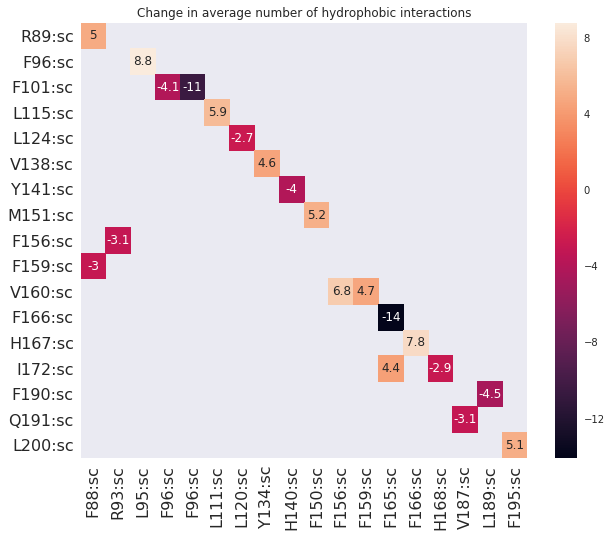

In [65]:
heat_2r_hphob = edges_2r_subhphob[['node_i','node_j','avg_subt']].loc[edges_2r_subhphob['attribute_x'] == 'HPHOB']
heat_2r_hphob = heat_2r_hphob.pivot(index='node_i',columns='node_j')
heat_2r_hphob = heat_2r_hphob.dropna(axis=1,how='all') # drop columns with all nan's
ylabels = [idxToResid(i, nodes_r) for i in [x[1] for x in list(heat_2r_hphob)]] # get node_j's, convert idxToResid
xlabels = [idxToResid(i, nodes_r) for i in list(heat_2r_hphob.index.values)] # get node_i's, convert idxToResid

plt.clf()
plt.subplots(figsize=(10,8))
sns.set(font_scale=1.0)
ax = sns.heatmap(heat_2r_hphob.T,annot=True,yticklabels=ylabels,xticklabels=xlabels)
plt.ylabel('')
plt.xlabel('')
plt.title('Change in average number of hydrophobic interactions')
plt.show()

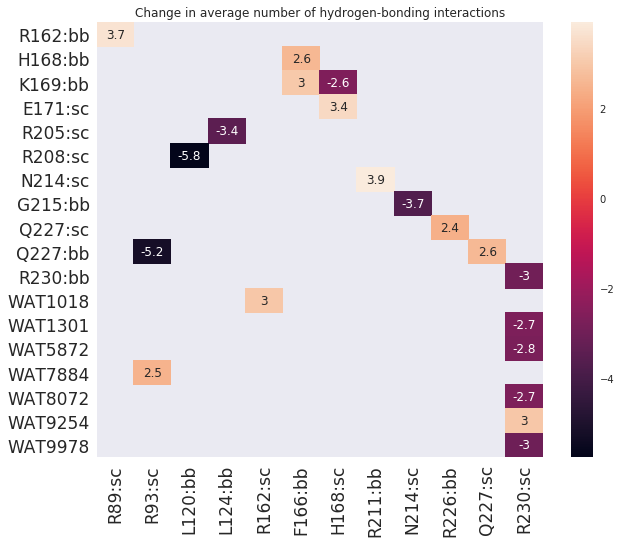

In [68]:
edges_2r_maxhbond = edges_2r.loc[edges_2r['attribute_x'] == 'HBOND'].sort_values('avg_subt',ascending=False).head(10)
edges_2r_minhbond = edges_2r.loc[edges_2r['attribute_x'] == 'HBOND'].sort_values('avg_subt',ascending=True).head(10)
edges_2r_subhbond = pd.concat([edges_2r_maxhbond,edges_2r_minhbond])

heat_2r_hbond = edges_2r_subhbond[['node_i','node_j','avg_subt']].loc[edges_2r_subhbond['attribute_x'] == 'HBOND']
heat_2r_hbond = heat_2r_hbond.pivot(index='node_i',columns='node_j')
heat_2r_hbond = heat_2r_hbond.dropna(axis=1,how='all') # drop columns with all nan's
ylabels = [idxToResid(i, nodes_r) for i in [x[1] for x in list(heat_2r_hbond)]] # get node_j's, convert idxToResid
xlabels = [idxToResid(i, nodes_r) for i in list(heat_2r_hbond.index.values)] # get node_i's, convert idxToResid

plt.clf()
plt.subplots(figsize=(10,8))
sns.set(font_scale=1.0)
ax = sns.heatmap(heat_2r_hbond.T,annot=True,yticklabels=ylabels,xticklabels=xlabels)
plt.ylabel('')
plt.xlabel('')
plt.title('Change in average number of hydrogen-bonding interactions')
plt.show()

### Check out GBI interactions with Hv1

In [119]:
# Get all node indices that are related to GBI
gidx_2 = nodes_2.index[nodes_2['resname'] == 'GBI2'].tolist()
# Get all the edge interactions that relate to GBI
g_edges_2 = edges_2.loc[edges_2['node_i'].isin(gidx_2) | edges_2['node_j'].isin(gidx_2)]
# Pull out the N strongest interactions
g_edges_2 = g_edges_2.sort_values('average',ascending=False).head(50)
# put all the GBI nodes in the i spot
g_edges_2["node_i"], g_edges_2["node_j"] = np.where(g_edges_2['node_j'].isin(gidx_2), [g_edges_2["node_j"], g_edges_2["node_i"]], [g_edges_2["node_i"], g_edges_2["node_j"] ])
# pivot table for plotting
g_edges_2 = g_edges_2.pivot(index='node_i',columns='node_j', values='average')
g_edges_2 = g_edges_2.dropna(axis=1,how='all') # drop columns with all nan's
g_edges_2

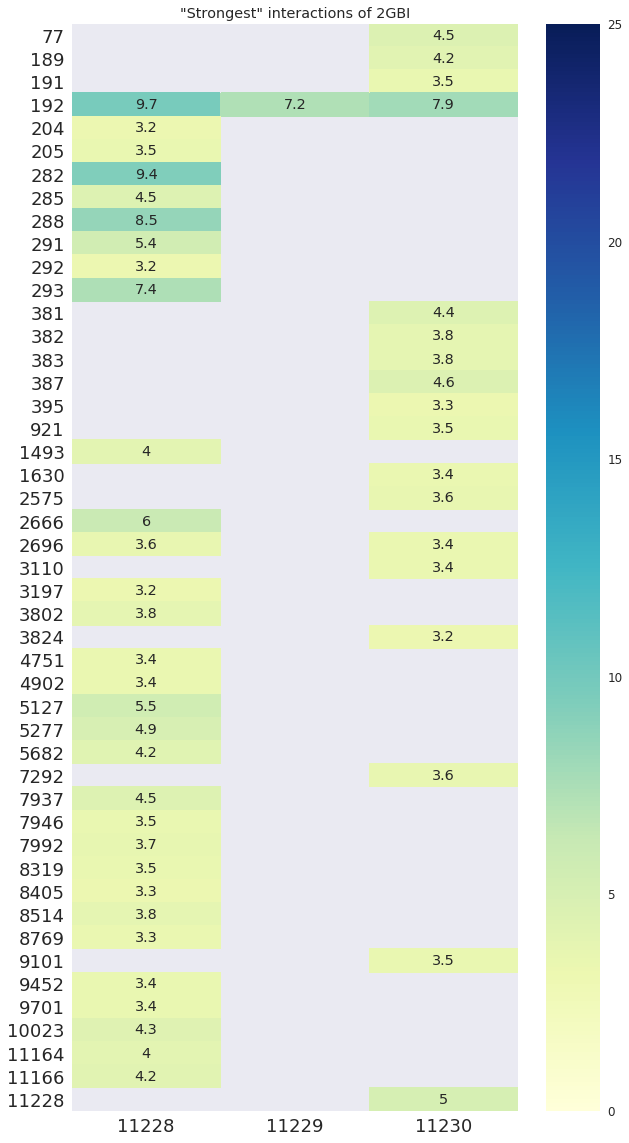

In [142]:
ylabels = [idxToResid(i, nodes_2) for i in list(g_edges_2)] # get node_j's, convert idxToResid
xlabels = [idxToResid(i, nodes_2) for i in list(g_edges_2.index.values)] # get node_i's, convert idxToResid

plt.clf()
plt.subplots(figsize=(10,20))
sns.set(font_scale=1.2)
#ax = sns.heatmap(g_edges_2.T,annot=True,yticklabels=ylabels,xticklabels=xlabels,cmap="YlGnBu",vmin=0, vmax=25) # check color range
ax = sns.heatmap(g_edges_2.T,annot=True,cmap="YlGnBu",vmin=0, vmax=25) # check color range
plt.ylabel('')
plt.xlabel('')
plt.title('\"Strongest\" interactions of 2GBI')
plt.show()

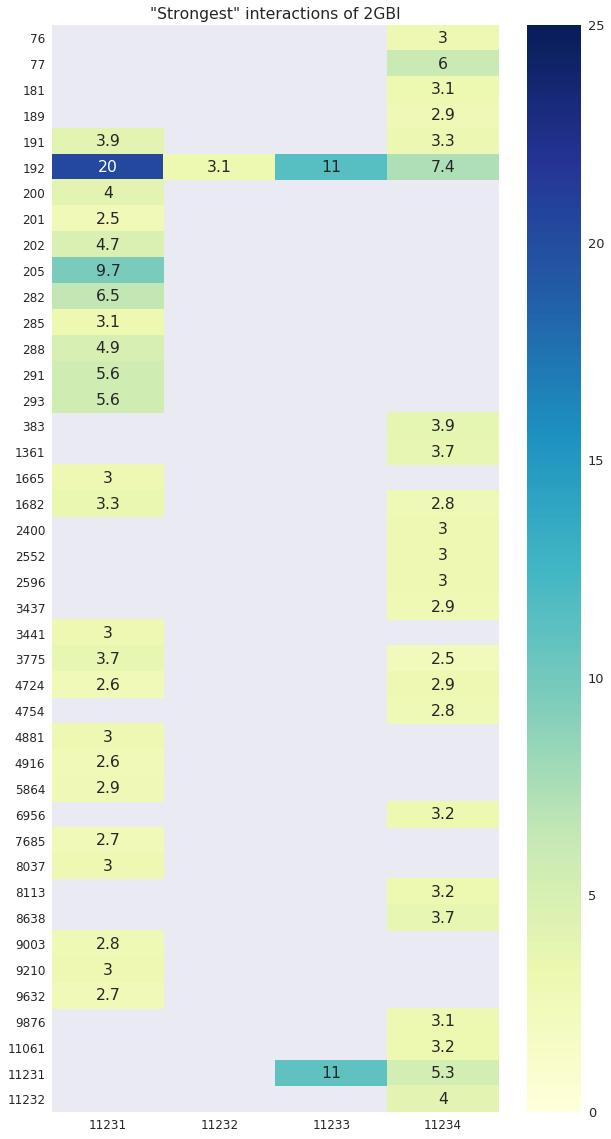

In [146]:
# Get all node indices that are related to GBI
gidx_1 = nodes_1.index[nodes_1['resname'] == 'GBI1'].tolist()
# Get all the edge interactions that relate to GBI
g_edges_1 = edges_1.loc[edges_1['node_i'].isin(gidx_1) | edges_1['node_j'].isin(gidx_1)]
# Pull out the N strongest interactions
g_edges_1 = g_edges_1.sort_values('average',ascending=False).head(50)
# put all the GBI nodes in the i spot
g_edges_1["node_i"], g_edges_1["node_j"] = np.where(g_edges_1['node_j'].isin(gidx_1), [g_edges_1["node_j"], g_edges_1["node_i"]], [g_edges_1["node_i"], g_edges_1["node_j"]])
# pivot table for plotting
g_edges_1 = g_edges_1.pivot(index='node_i',columns='node_j', values='average')
g_edges_1 = g_edges_1.dropna(axis=1,how='all') # drop columns with all nan's


#ylabels = [idxToResid(i, nodes_1) for i in list(g_edges_1)] # get node_j's, convert idxToResid
#xlabels = [idxToResid(i, nodes_1) for i in list(g_edges_1.index.values)] # get node_i's, convert idxToResid

plt.clf()
plt.subplots(figsize=(10,20))
sns.set(font_scale=1.3)
#ax = sns.heatmap(g_edges_1.T,annot=True,yticklabels=ylabels,xticklabels=xlabels,cmap="YlGnBu",vmin=0, vmax=25) # check color range
ax = sns.heatmap(g_edges_1.T,annot=True,cmap="YlGnBu",vmin=0, vmax=25) # check color range
plt.ylabel('')
plt.xlabel('')
plt.title('\"Strongest\" interactions of 2GBI')
plt.show()

In [48]:
print(edges_2r['avg_subt'].describe())
edges_2r.nlargest(5,'avg_subt')

count    28574.000000
mean        -0.000922
std          0.638912
min        -14.070565
25%          0.000000
50%          0.000000
75%          0.000000
max          8.755953
Name: avg_subt, dtype: float64


,node_i,node_j,weight_x,attribute_x,count_x,average_x,weight_y,attribute_y,count_y,average_y,avg_subt
1381,25,28,8673,HPHOB,500.0,17.346000,3625,HPHOB,422.0,8.590047,8.755953
7570,144,148,6034,STER,500.0,12.068000,2113,STER,500.0,4.226000,7.842000
8859,243,246,3984,HPHOB,440.0,9.054545,254,HPHOB,198.0,1.282828,7.771717
8861,243,248,3468,STER,397.0,8.735516,60,STER,43.0,1.395349,7.340168
8862,243,249,5651,STER,500.0,11.302000,2084,STER,500.0,4.168000,7.134000


In [48]:
print(edges_2r['avg_subt'].describe())
edges_2r.nlargest(5,'avg_subt')

count    28574.000000
mean        -0.000922
std          0.638912
min        -14.070565
25%          0.000000
50%          0.000000
75%          0.000000
max          8.755953
Name: avg_subt, dtype: float64


,node_i,node_j,weight_x,attribute_x,count_x,average_x,weight_y,attribute_y,count_y,average_y,avg_subt
1381,25,28,8673,HPHOB,500.0,17.346000,3625,HPHOB,422.0,8.590047,8.755953
7570,144,148,6034,STER,500.0,12.068000,2113,STER,500.0,4.226000,7.842000
8859,243,246,3984,HPHOB,440.0,9.054545,254,HPHOB,198.0,1.282828,7.771717
8861,243,248,3468,STER,397.0,8.735516,60,STER,43.0,1.395349,7.340168
8862,243,249,5651,STER,500.0,11.302000,2084,STER,500.0,4.168000,7.134000


In [48]:
print(edges_2r['avg_subt'].describe())
edges_2r.nlargest(5,'avg_subt')

count    28574.000000
mean        -0.000922
std          0.638912
min        -14.070565
25%          0.000000
50%          0.000000
75%          0.000000
max          8.755953
Name: avg_subt, dtype: float64


,node_i,node_j,weight_x,attribute_x,count_x,average_x,weight_y,attribute_y,count_y,average_y,avg_subt
1381,25,28,8673,HPHOB,500.0,17.346000,3625,HPHOB,422.0,8.590047,8.755953
7570,144,148,6034,STER,500.0,12.068000,2113,STER,500.0,4.226000,7.842000
8859,243,246,3984,HPHOB,440.0,9.054545,254,HPHOB,198.0,1.282828,7.771717
8861,243,248,3468,STER,397.0,8.735516,60,STER,43.0,1.395349,7.340168
8862,243,249,5651,STER,500.0,11.302000,2084,STER,500.0,4.168000,7.134000


In [49]:
edges_2r.nsmallest(5,'avg_subt')

,node_i,node_j,weight_x,attribute_x,count_x,average_x,weight_y,attribute_y,count_y,average_y,avg_subt
8775,240,243,1,HPHOB,1.0,1.000000,7475,HPHOB,496.0,15.070565,-14.070565
1455,28,46,2837,HPHOB,443.0,6.404063,8386,HPHOB,495.0,16.941414,-10.537351
12057,310,375,120,STER,89.0,1.348315,4633,STER,500.0,9.266000,-7.917685
12265,323,375,1181,COUL,422.0,2.798578,4551,COUL,500.0,9.102000,-6.303422
7654,150,157,322,STER,213.0,1.511737,2400,STER,317.0,7.570978,-6.059241


In [114]:
# pick out some row by two specified nodes
edges_2r[(edges_2r.node_i == 323) & (edges_2r.node_j == 375)]

,node_i,node_j,weight_x,attribute_x,count_x,average_x,weight_y,attribute_y,count_y,average_y,avg_subt
12265,323,375,1181,COUL,422.0,2.798578,4551,COUL,500.0,9.102,-6.303422


In [36]:
edges_2[(edges_2.node_i == 1) & (edges_2.node_j == 4)]

,node_i,node_j,weight,attribute,count,average
2,1,4,432,STER,432.0,1.0


In [37]:
edges_r[(edges_r.node_i == 1) & (edges_r.node_j == 4)]

,node_i,node_j,weight,attribute,count,average
2,1,4,307,STER,307.0,1.0


In [37]:
print(edges_2['average'].describe())
edges_2.nlargest(5,'average')

count    859825.000000
mean          1.103472
std           0.381411
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          20.532000
Name: average, dtype: float64


,node_i,node_j,weight,attribute,count,average
126285,369,371,10266,HPHOB,500.0,20.532000
12650,25,28,8673,HPHOB,500.0,17.346000
117102,334,348,7049,HPHOB,500.0,14.098000
66792,205,292,6932,HPHOB,497.0,13.947686
65962,192,292,6570,HPHOB,500.0,13.140000


### Check out details on particular pairs

In [13]:
 # subtract 1 from edge index to get node details
print(nodes.iloc[[368,370]])
print(nodes.iloc[[239,242]])
print(nodes.iloc[[27,45]])
print(nodes.iloc[[2,220]])
print(nodes.iloc[[2,13]])

      resname  resid location type  code  nAtoms
index                                           
369       TRP    207       sc  NOP  ABGD       4
371       TRP    207       sc  NOP   EZH       6
      resname  resid location type  code  nAtoms
index                                           
240       PHE    165       sc  NOP  GDEZ       6
243       PHE    166       sc  NOP  GDEZ       6
      resname  resid location type  code  nAtoms
index                                           
28        PHE     96       sc  NOP  GDEZ       6
46        PHE    101       sc  NOP  GDEZ       6
      resname  resid location type  code  nAtoms
index                                           
3         PHE     88       sc  NOP  GDEZ       6
221       PHE    159       sc  NOP  GDEZ       6
      resname  resid location type  code  nAtoms
index                                           
3         PHE     88       sc  NOP  GDEZ       6
14        LEU     92       sc  NOP    GD       3


### Check out details interaction types

In [14]:
edges['attribute'].describe()

count     968883
unique         4
top        HBOND
freq      877580
Name: attribute, dtype: object

### Check out details interaction types

In [68]:
edges_2r.loc[edges_2r['attribute_x'] == 'COUL'].sort_values('avg_subt',ascending=False)

,node_i,node_j,weight_x,attribute_x,count_x,average_x,weight_y,attribute_y,count_y,average_y,avg_subt
3166,96,323,2469,COUL,493.0,5.008114,339,COUL,304.0,1.115132,3.892982
81,6,230,262,COUL,59.0,4.440678,30,COUL,26.0,1.153846,3.286832
465,18,426,519,COUL,99.0,5.242424,1093,COUL,396.0,2.760101,2.482323
8534,230,237,1086,COUL,155.0,7.006452,2850,COUL,497.0,5.734406,1.272045
2933,77,383,789,COUL,470.0,1.678723,464,COUL,446.0,1.040359,0.638365
8273,202,215,672,COUL,330.0,2.036364,821,COUL,458.0,1.792576,0.243787
8401,215,419,13,COUL,10.0,1.300000,550,COUL,466.0,1.180258,0.119742
3355,109,364,3100,COUL,500.0,6.200000,3041,COUL,500.0,6.082000,0.118000
8274,202,419,4558,COUL,498.0,9.152610,4599,COUL,500.0,9.198000,-0.045390
11680,274,430,3039,COUL,500.0,6.078000,3091,COUL,500.0,6.182000,-0.104000


In [17]:
edges.loc[edges['attribute'] == 'COUL'].sort_values('average',ascending=False).head(5)

,node_i,node_j,weight,attribute,count,average
84880,202,419,4599,COUL,500.0,9.198
114608,323,375,4551,COUL,500.0,9.102
86454,230,264,4537,COUL,500.0,9.074
109892,302,383,3168,COUL,500.0,6.336
1535,6,446,3140,COUL,500.0,6.280


In [18]:
edges.loc[edges['attribute'] == 'HBOND'].sort_values('average',ascending=False).head(5)

,node_i,node_j,weight,attribute,count,average
31339,55,58,4500,HBOND,500.0,9.0
109386,285,287,4500,HBOND,500.0,9.0
109183,281,283,4500,HBOND,500.0,9.0
109028,279,281,4500,HBOND,500.0,9.0
42426,120,123,4500,HBOND,500.0,9.0


In [19]:
edges.loc[edges['attribute'] == 'HPHOB'].sort_values('average',ascending=False).head(5)

,node_i,node_j,weight,attribute,count,average
143129,369,371,10306,HPHOB,500.0,20.612000
15259,28,46,8386,HPHOB,495.0,16.941414
88938,240,243,7475,HPHOB,496.0,15.070565
84619,192,11231,7314,HPHOB,500.0,14.628000
100611,256,260,7265,HPHOB,500.0,14.530000


In [20]:
edges.loc[edges['attribute'] == 'STER'].sort_values('average',ascending=False).head(5)

,node_i,node_j,weight,attribute,count,average
28866,46,50,6380,STER,500.0,12.760
85989,226,231,6301,STER,500.0,12.602
109527,292,296,6066,STER,500.0,12.132
78263,155,165,5977,STER,500.0,11.954
84352,189,193,5883,STER,500.0,11.766


In [21]:
coulres = np.unique(edges.loc[edges['attribute'] == 'COUL'][['node_i','node_j']])
coulres = list(coulres-1) # for zero-based indexing
print(coulres)

[0, 5, 17, 76, 95, 108, 130, 134, 201, 214, 229, 236, 263, 273, 301, 322, 363, 374, 382, 418, 425, 429, 442, 445, 11233]


In [22]:
nodes.iloc[coulres]

,resname,resid,location,type,code,nAtoms
index,,,,,,
1,PHE,88,bb,POS,NT,1
6,ARG,89,sc,POS,EZ,4
18,ARG,93,sc,POS,EZ,4
77,ASP,112,sc,NEG,D,2
96,GLU,119,sc,NEG,DE,3
109,ASP,123,sc,NEG,D,2
131,ASP,130,sc,NEG,D,2
135,LYS,131,sc,POS,Z,1
202,GLU,153,sc,NEG,DE,3
